# Top Spotify Songs (2010-2019) Outlier Analysis

### Data Description

Each row represents an individual song as it appeared in the Billboard end of the year chart. Data collected by Leonardo Henrique on Kaggle.

[Link to data source](https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year?resource=download)

### Column Descriptions

**Track Metadata**
| name | description |
| --- | --- |
| title | Song title |
| artist | Song artist |
| top genre | Song genre category |
| year | Song Billboard chart entry year |

**Audio Quantitive Data**
| name | description |
| --- | --- |
| db | Loudness - How loud a song is (db/decibels) |
| dur | Duration - How long the song is (seconds) |
| bpm |  Tempo - How fast a song is (bpm/beats per minute) |

**Audio Qualitative Data**
| name | description |
| --- | --- |
| nrgy | Energy level - How energetic the song is |
| dnce | Dancability - How easy it is to dance to |
| live | Liveness - How likely a song is to a be a live recording |
| val | Valence - How positive the mood of the song is |
| acous | Acousticness - How accoustic sounding the song is |
| spch | Speechiness - How much of a song is spoken word |
| pop | Popularity - How popular a song is (as of time of data collection) |

## Load Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load pandas dataframe
df = pd.read_csv('./top10s.csv', encoding='ISO-8859-1')

# Drop id column
df = df.iloc[:,1:]

df.head(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


## Data Exploration

In [5]:
# Number of observations
df.shape

(603, 14)

In [6]:
# Data distribution and scales (minmums and maximums)
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [7]:
# Check for missing data
df.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

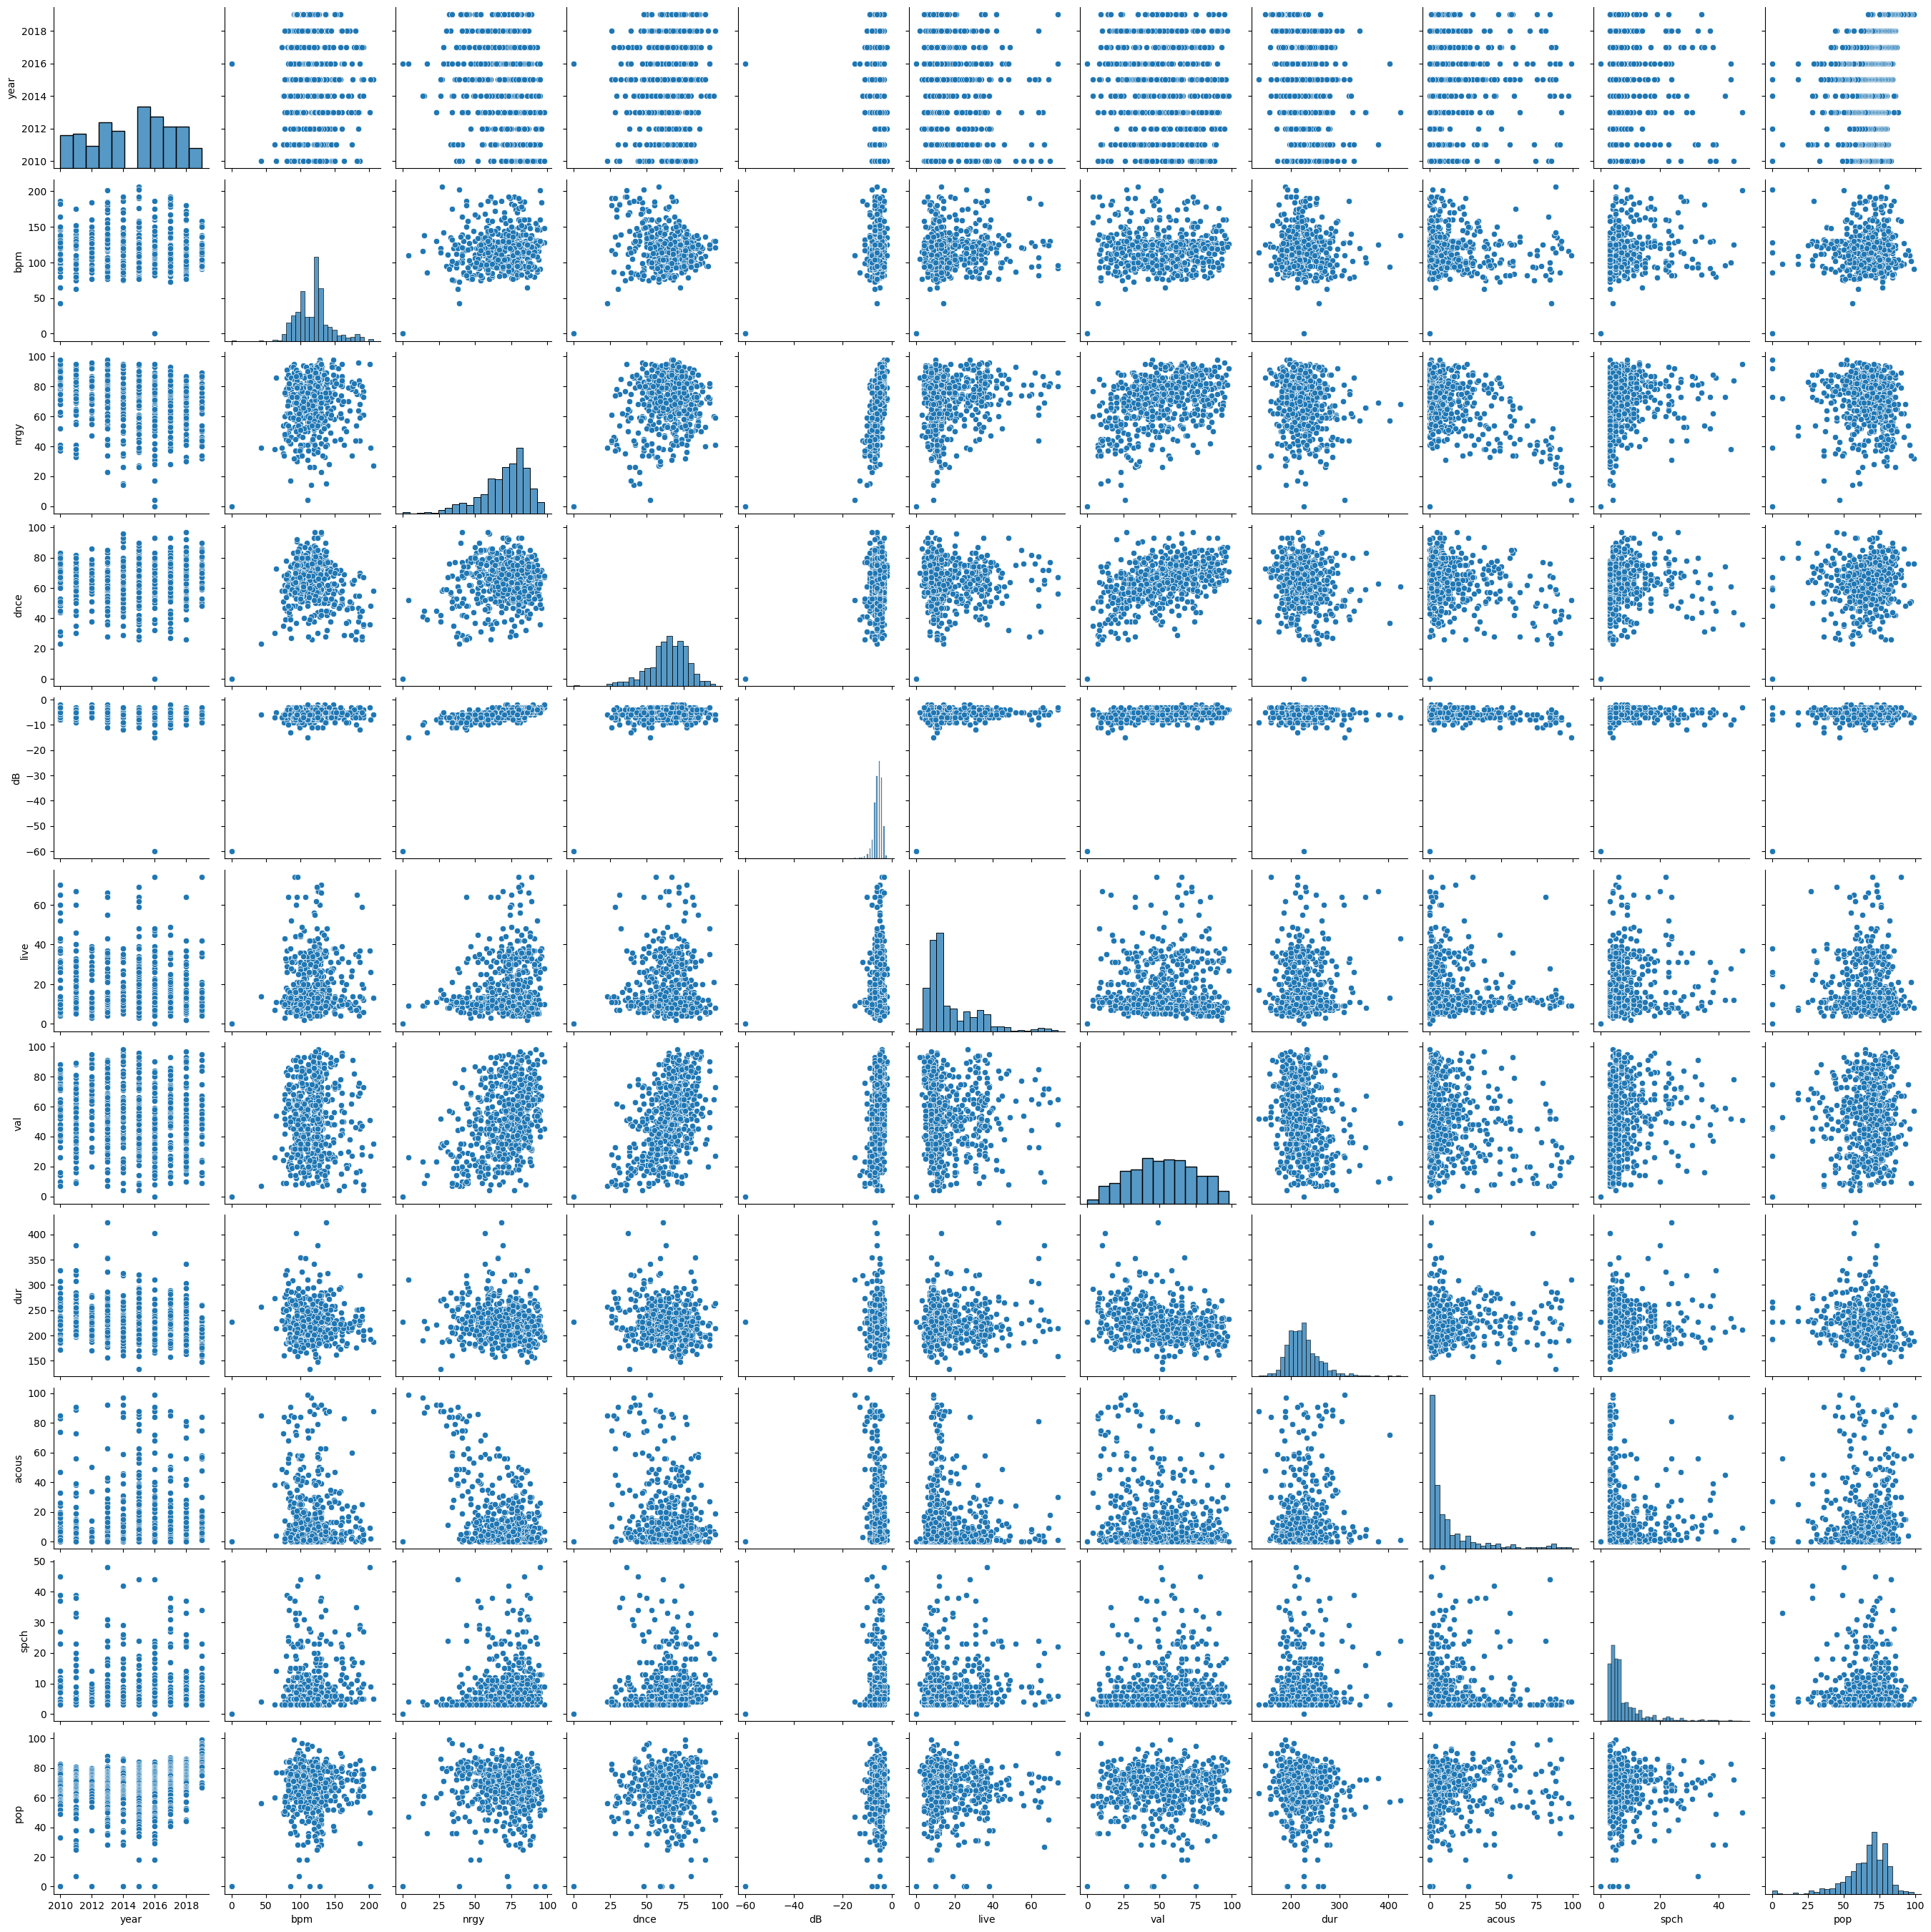

In [8]:
# Pairplot and data distributions
sns.pairplot(df)

<AxesSubplot: >

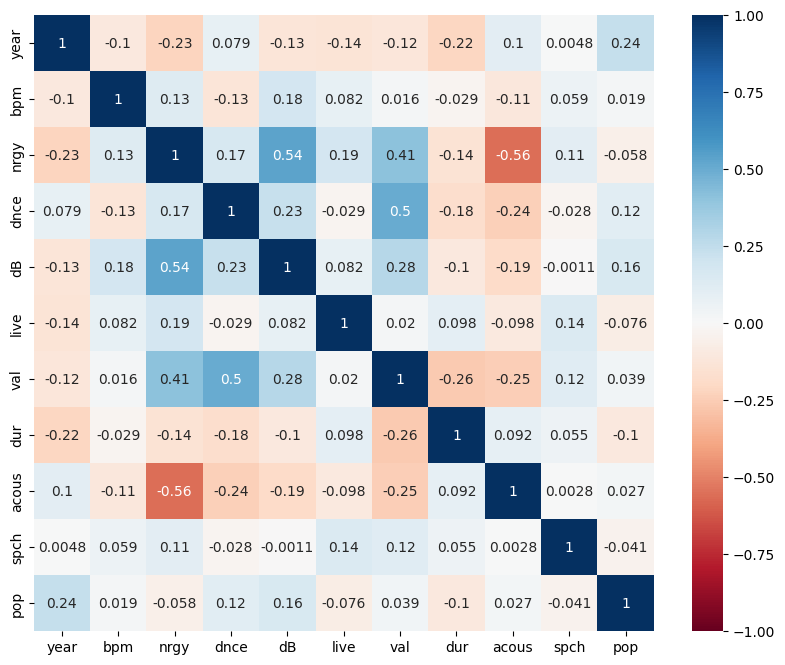

In [9]:
# Correlation heatmap
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu', ax=ax)

## Data Preprocessing

In [10]:
# Normalize our data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
metadata = ['title', 'artist', 'top genre', 'year']
normdf = pd.DataFrame(scaler.fit_transform(df.drop(columns=metadata)), columns = df.drop(columns=metadata).columns)
normdf

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,0.470874,0.908163,0.690722,0.965517,0.108108,0.816327,0.286207,0.191919,0.083333,0.838384
1,0.422330,0.948980,0.773196,0.948276,0.702703,0.653061,0.444828,0.242424,0.479167,0.828283
2,0.582524,0.857143,0.783505,0.982759,0.391892,0.724490,0.227586,0.101010,0.291667,0.808081
3,0.577670,0.938776,0.721649,0.965517,0.108108,0.724490,0.555172,0.000000,0.083333,0.797980
4,0.529126,0.857143,0.659794,0.948276,0.121622,0.438776,0.300000,0.020202,0.083333,0.787879
...,...,...,...,...,...,...,...,...,...,...
598,0.504854,0.673469,0.628866,0.913793,0.270270,0.163265,0.144828,0.010101,0.062500,0.757576
599,0.461165,0.806122,0.773196,0.931034,0.094595,0.622449,0.248276,0.212121,0.250000,0.757576
600,0.660194,0.775510,0.546392,0.948276,0.121622,0.663265,0.434483,0.070707,0.708333,0.707071
601,0.553398,0.806122,0.618557,0.931034,0.567568,0.244898,0.286207,0.010101,0.145833,0.696970


In [11]:
# Apply PCA to our numerical data
from sklearn import decomposition

pca = decomposition.PCA(n_components=5) # Reduce number of columns to 5
pca.fit(normdf)
normdf = pd.DataFrame(pca.transform(normdf))
normdf

,0,1,2,3,4
0,-0.234816,-0.242389,-0.085571,-0.061437,-0.047112
1,-0.205307,0.087620,0.521754,-0.115194,-0.189543
2,-0.278370,-0.042280,0.153561,-0.077885,-0.143808
3,-0.268153,-0.025596,-0.155317,-0.010889,-0.044690
4,-0.043821,0.084061,-0.219651,-0.028127,-0.082046
...,...,...,...,...,...
598,0.194441,0.245050,-0.198174,-0.130714,-0.082141
599,-0.084858,-0.186301,-0.047918,0.061897,-0.082140
600,-0.137504,-0.002697,0.186872,0.456663,-0.284962
601,0.063805,0.397949,0.095256,-0.178959,-0.040824


In [12]:
# Put back metadata columns with value replacement
metadata_dict = {}
for i in metadata:
    dict = {}
    metadata_dict[i] = {}
    for j in range(len(df[i].unique())):
        dict[df[i].unique()[j]] = j
        metadata_dict[i][j] = df[i].unique()[j]
    normdf[i] = df[i].map(dict)
normdf

,0,1,2,3,4,title,artist,top genre,year
0,-0.234816,-0.242389,-0.085571,-0.061437,-0.047112,0,0,0,0
1,-0.205307,0.087620,0.521754,-0.115194,-0.189543,1,1,1,0
2,-0.278370,-0.042280,0.153561,-0.077885,-0.143808,2,2,2,0
3,-0.268153,-0.025596,-0.155317,-0.010889,-0.044690,3,3,2,0
4,-0.043821,0.084061,-0.219651,-0.028127,-0.082046,4,4,3,0
...,...,...,...,...,...,...,...,...,...
598,0.194441,0.245050,-0.198174,-0.130714,-0.082141,579,107,2,9
599,-0.084858,-0.186301,-0.047918,0.061897,-0.082140,580,105,3,9
600,-0.137504,-0.002697,0.186872,0.456663,-0.284962,581,153,2,9
601,0.063805,0.397949,0.095256,-0.178959,-0.040824,582,107,2,9


## Model Building

In [13]:
from kmodes.kprototypes import KPrototypes
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# Functions for calculating distance
def matching_dissim(a, b):
    return np.sum(a != b)

def euclidean_dissim(a, b):
    return np.sum((a - b) ** 2)

# Split data into numerical and categorical 
num = normdf.to_numpy()[:,0:5]
cat = normdf.to_numpy()[:,5:9]

# Set weight to half of the mean standard deviation of the numerical data
gamma = 0.5 * np.mean(num.std(axis=0))

2 clusters cost: 277.070989346467


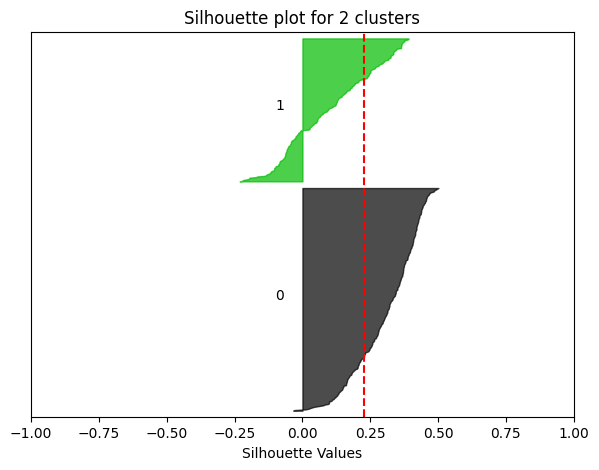

3 clusters cost: 257.17113785829974


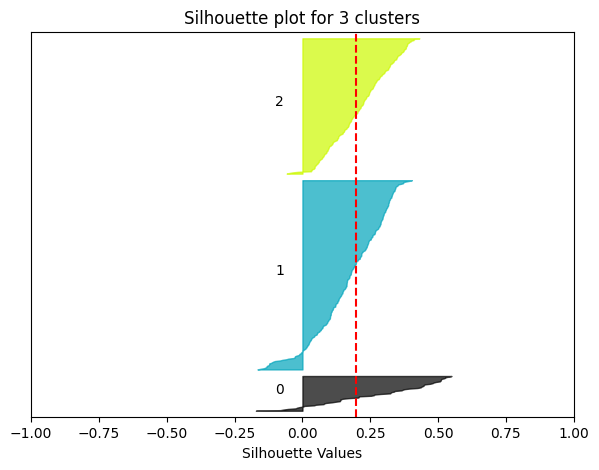

4 clusters cost: 245.10889564905813


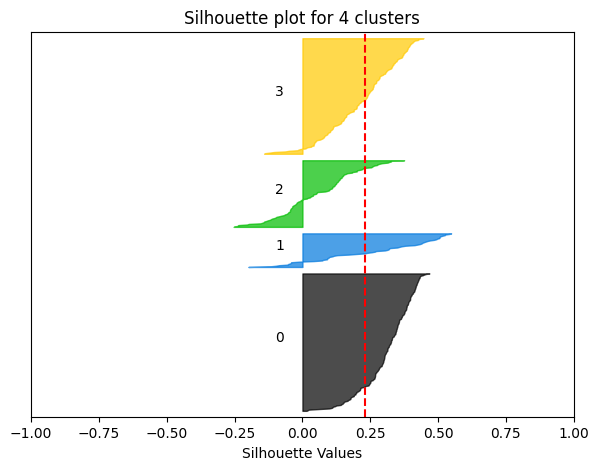

5 clusters cost: 238.66899912380052


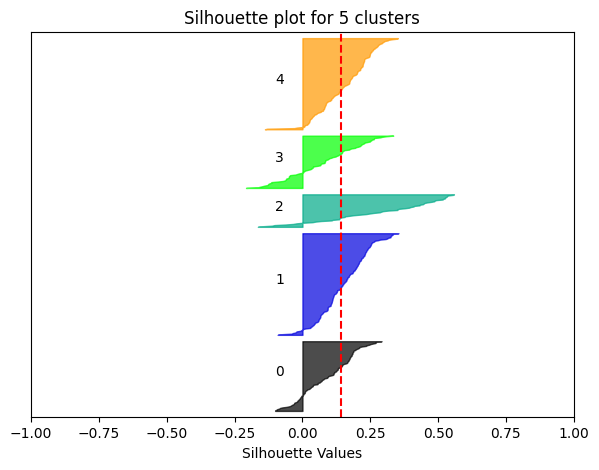

6 clusters cost: 232.34884414707747


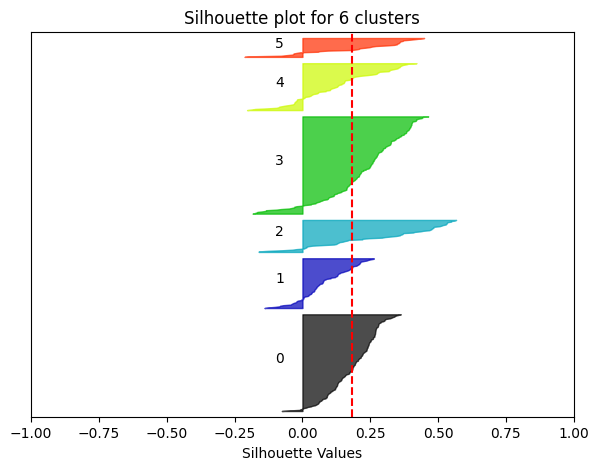

7 clusters cost: 227.52873262053865


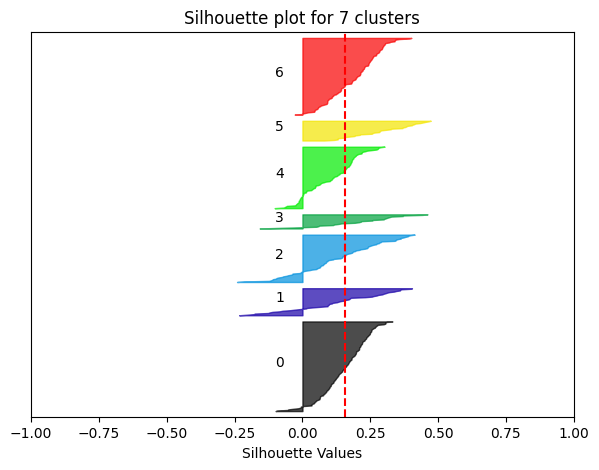

8 clusters cost: 222.43139124244345


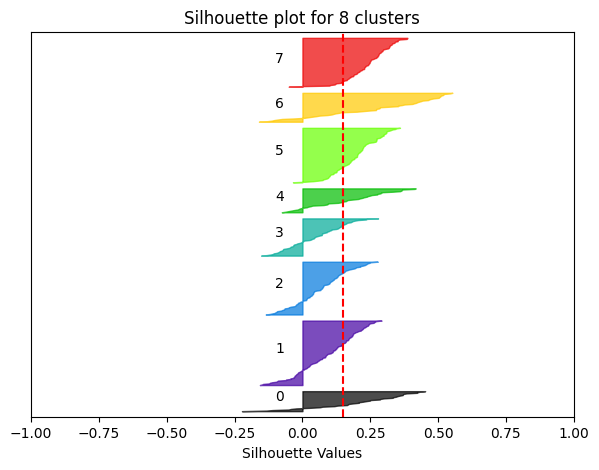

9 clusters cost: 217.1122157109383


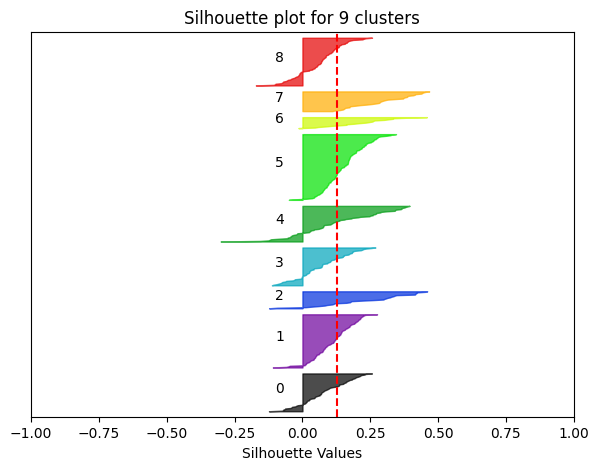

In [14]:
# Track cost values for each iteration of K-Prototypes
# Also plot silhouette values

costs = []

def calc_silhouette(i, labels, centroids):
    # Find closest cluster
    closest_cluster = -1
    min_dist = -1
    for j in range(len(centroids)):
        if j != labels[i]:
            num_cost = euclidean_dissim(centroids[j][0:5], centroids[labels[i]][0:5])
            cat_cost = matching_dissim(centroids[j][5:9], centroids[labels[i]][5:9])
            dist = num_cost + gamma * cat_cost
            if min_dist == -1 or min_dist > dist:
                min_dist = dist
                closest_cluster = j

    # Calculate average distance in same cluster
    cnt = 0
    a = 0
    for j in range(len(labels)):
        if i != j and labels[i] == labels[j]:
            cnt += 1
            num_cost = euclidean_dissim(num[j], num[i])
            cat_cost = matching_dissim(cat[j], cat[i])
            a += num_cost + gamma * cat_cost
    a = a / cnt

    # Calculate average distance in closest cluster
    cnt = 0
    b = 0
    for j in range(len(labels)):
        if i != j and labels[j] == closest_cluster:
            cnt += 1
            num_cost = euclidean_dissim(num[j], num[i])
            cat_cost = matching_dissim(cat[j], cat[i])
            b += num_cost + gamma * cat_cost
    b = b / cnt

    return (b - a)/max(b, a)

for cluster in range(2, 10):
    # Run K-Prototypes
    kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang')
    kprototype.fit(normdf.to_numpy(), categorical = [5,6,7,8])
    labels = kprototype.labels_
    centroids = kprototype.cluster_centroids_
    costs.append(kprototype.cost_)
    print(f'{cluster} clusters cost: {kprototype.cost_}')

    # Plot silhouette
    silhouette_vals = []
    for i in range(len(normdf)):
        silhouette_vals.append(calc_silhouette(i, labels, centroids))
    avg = sum(silhouette_vals)/len(silhouette_vals)

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, len(normdf) + (cluster + 1) * 10])
    y_lower = 10
    for i in range(cluster):
        # Get silhouette values for cluster i
        silhouette_vals_i = []
        for j in range(len(normdf)):
            if labels[j] == i:
                silhouette_vals_i.append(silhouette_vals[j])

        silhouette_vals_i.sort()

        cluster_size = len(silhouette_vals_i)
        y_upper = y_lower + cluster_size

        color = cm.nipy_spectral(float(i) / cluster)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, silhouette_vals_i,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.1, y_lower + 0.5 * cluster_size, str(i))

        y_lower = y_upper + 10

    ax.set_title(f'Silhouette plot for {cluster} clusters')
    ax.set_xlabel('Silhouette Values')
    ax.set_yticks([])
    ax.axvline(x=avg, color="red", linestyle="--")
    plt.show()

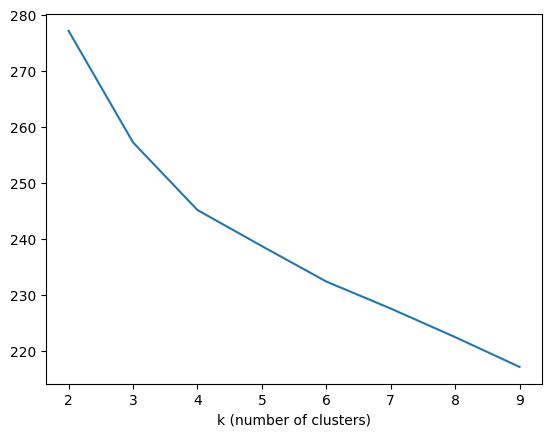

In [15]:
# Plotting cost
plt.plot(range(2, len(costs) + 2), costs)
plt.xlabel('k (number of clusters)')
plt.show()

Using the elbow method, we choose to use k = 7 clusters which represents the "elbow" of the cost curve.

Before that k = 7, we have a curve starting from the beginning and after that point we have a linear line. The point where the graphical flow changes is at point 7.

To confirm this selection, we look at the silhouette plot for 7 clusters. We can see that the distribution is relatively close across all clusters and there are no instances where a cluster is completely below the average line. Overall, it confirms our choice of 7 clusters.

In [16]:
# Fit 7 cluster model
model = KPrototypes(n_jobs=-1, n_clusters=7, init='Huang')
model.fit(normdf.to_numpy(), categorical = [5,6,7,8])
model.cluster_centroids_

array([[ 1.53933569e-01,  1.45952157e-01, -1.11865431e-01,
         4.88282212e-03, -3.36998117e-02,  2.94000000e+02,
         9.80000000e+01,  2.00000000e+00,  6.00000000e+00],
       [-1.26448666e-02, -6.90426609e-03,  3.21850661e-01,
         3.53087313e-01, -1.83707173e-01,  4.80000000e+01,
         4.30000000e+01,  2.00000000e+00,  7.00000000e+00],
       [-2.36130169e-01, -1.46814855e-01, -6.38250919e-02,
        -6.67800973e-03, -7.63062679e-03,  1.09000000e+02,
         2.00000000e+00,  2.00000000e+00,  3.00000000e+00],
       [-1.88927539e-01, -1.02658316e-02,  5.00431863e-03,
         5.90188394e-02,  1.30230996e-01,  4.60000000e+01,
         2.10000000e+01,  2.00000000e+00,  4.00000000e+00],
       [-2.11324514e-03, -4.23058164e-02, -1.05444803e-01,
        -3.12060615e-02, -4.80906231e-02,  4.00000000e+00,
         4.00000000e+00,  2.00000000e+00,  8.00000000e+00],
       [ 6.31629781e-01, -2.18952299e-01,  8.32422057e-02,
        -4.45686437e-02,  6.37155292e-02,  3.860000

In [17]:
normdf['cluster label'] = model.labels_

In [18]:
centroids = model.cluster_centroids_
labels = model.labels_

costs = []

# Sum costs to verify that our custom cost function implementation works
for i in range(len(normdf)):
    num_cost = euclidean_dissim(num[i], centroids[labels[i]][0:5])
    cat_cost = matching_dissim(cat[i], centroids[labels[i]][5:9])

    costs.append(num_cost + gamma * cat_cost)

print(f'total : {np.sum(costs)}')
print(f'cost (from model): {model.cost_}')

total : 227.2613984076254
cost (from model): 227.26139840762536


This matches!

In [19]:
# Add costs to dataframe
normdf['cluster cost'] = costs

# Remap the metadata
for i in metadata:
    normdf[i] = normdf[i].map(metadata_dict[i])
normdf

,0,1,2,3,4,title,artist,top genre,year,cluster label,cluster cost
0,-0.234816,-0.242389,-0.085571,-0.061437,-0.047112,"Hey, Soul Sister",Train,neo mellow,2010,2,0.399529
1,-0.205307,0.087620,0.521754,-0.115194,-0.189543,Love The Way You Lie,Eminem,detroit hip hop,2010,6,0.546163
2,-0.278370,-0.042280,0.153561,-0.077885,-0.143808,TiK ToK,Kesha,dance pop,2010,2,0.276265
3,-0.268153,-0.025596,-0.155317,-0.010889,-0.044690,Bad Romance,Lady Gaga,dance pop,2010,2,0.314504
4,-0.043821,0.084061,-0.219651,-0.028127,-0.082046,Just the Way You Are,Bruno Mars,pop,2010,4,0.224595
...,...,...,...,...,...,...,...,...,...,...,...
598,0.194441,0.245050,-0.198174,-0.130714,-0.082141,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,0,0.328666
599,-0.084858,-0.186301,-0.047918,0.061897,-0.082140,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,2,0.420313
600,-0.137504,-0.002697,0.186872,0.456663,-0.284962,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,1,0.343830
601,0.063805,0.397949,0.095256,-0.178959,-0.040824,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,6,0.375904


In [20]:
# Find top 10 highest cost rows
normdf.nlargest(10, ['cluster cost'])

,0,1,2,3,4,title,artist,top genre,year,cluster label,cluster cost
442,0.895049,0.278850,-0.322942,0.371045,0.666336,Million Years Ago,Adele,british soul,2016,5,1.307091
559,0.403632,-0.180299,0.942384,-0.128092,0.018125,Walk On Water (feat. Beyoncé),Eminem,detroit hip hop,2018,5,1.186019
271,0.462434,-0.431517,0.734323,0.286788,-0.398771,Love Yourself,Justin Bieber,canadian pop,2015,1,1.012141
364,0.462434,-0.431517,0.734323,0.286788,-0.398771,Love Yourself,Justin Bieber,canadian pop,2016,1,1.012141
63,0.197809,0.673572,0.476217,-0.168970,-0.179468,Monster,Kanye West,chicago rap,2011,6,0.816016
42,0.175549,0.712018,0.398940,-0.147009,-0.020685,Hard,Rihanna,barbadian pop,2010,6,0.769270
572,0.480809,-0.700198,0.114963,-0.241937,-0.163530,Memories,Maroon 5,pop,2019,5,0.731308
50,-0.143945,0.238278,-0.121866,0.297276,0.575608,Hello,Martin Solveig,big room,2010,3,0.720384
443,-0.057144,-0.635908,0.149803,-0.112267,-0.057874,Shape of You,Ed Sheeran,pop,2017,2,0.715922
279,0.061136,-0.576287,0.138782,-0.050077,-0.052862,What Do You Mean?,Justin Bieber,canadian pop,2015,2,0.703156


These are the 10 hit songs that stood out from the rest from 2010 - 2019!

In [21]:
# Bonus!
# Find top 10 lowest cost rows
normdf.nsmallest(10, ['cluster cost'])

,0,1,2,3,4,title,artist,top genre,year,cluster label,cluster cost
153,-0.287253,-0.089978,-0.011759,-0.125474,-0.016980,Die Young,Kesha,dance pop,2013,2,0.119096
237,-0.230577,-0.160016,-0.065516,-0.050349,0.079016,This Is How We Do,Katy Perry,dance pop,2014,3,0.140058
242,-0.242804,-0.218928,-0.036185,0.014994,0.056360,Birthday,Katy Perry,dance pop,2014,3,0.151875
152,-0.208960,-0.139652,-0.083057,0.001720,-0.043666,We Are Never Ever Getting Back Together,Taylor Swift,pop,2013,2,0.195210
19,-0.246962,-0.204208,-0.101335,0.018355,-0.028054,Your Love Is My Drug,Kesha,dance pop,2010,2,0.198544
525,-0.039330,-0.064768,-0.042323,-0.104776,-0.058527,These Days,Rudimental,dance pop,2018,4,0.204077
303,-0.065002,0.234834,0.161682,-0.219271,-0.009646,Jealous - Remix,Nick Jonas,dance pop,2015,6,0.204808
46,-0.178701,0.094438,-0.022832,0.064746,0.154846,Written in the Stars (feat. Eric Turner),Tinie Tempah,dance pop,2010,3,0.205163
93,-0.178701,0.094438,-0.022832,0.064746,0.154846,Written in the Stars (feat. Eric Turner),Tinie Tempah,dance pop,2011,3,0.205163
22,-0.220471,-0.125443,-0.158843,-0.026742,0.063133,Take It Off,Kesha,dance pop,2010,2,0.207822
